<a href="https://colab.research.google.com/github/DianaRiosDiaz/DAILY-ALCOHOL-CONSUMPTION-AND-LIVER-DISORDERS/blob/main/Alcohol_Diana_R%C3%ADos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install statsmodels
!pip install numpy
import pandas as pd
# Upload the data base “bupa.data” to the work environment
bupa = pd.read_csv('bupa.data', header=None)
bupa.columns = ['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks', 'selector']
bupa = pd.DataFrame(bupa)
bupa = bupa.drop('selector', axis=1)
print(bupa)
bupa = pd.DataFrame(bupa)
summary = bupa.describe()
print(summary)


     mcv  alkphos  sgpt  sgot  gammagt  drinks
0     85       92    45    27       31     0.0
1     85       64    59    32       23     0.0
2     86       54    33    16       54     0.0
3     91       78    34    24       36     0.0
4     87       70    12    28       10     0.0
..   ...      ...   ...   ...      ...     ...
340   99       75    26    24       41    12.0
341   96       69    53    43      203    12.0
342   98       77    55    35       89    15.0
343   91       68    27    26       14    16.0
344   98       99    57    45       65    20.0

[345 rows x 6 columns]
              mcv     alkphos        sgpt        sgot     gammagt      drinks
count  345.000000  345.000000  345.000000  345.000000  345.000000  345.000000
mean    90.159420   69.869565   30.405797   24.643478   38.284058    3.455072
std      4.448096   18.347670   19.512309   10.064494   39.254616    3.337835
min     65.000000   23.000000    4.000000    5.000000    5.000000    0.000000
25%     87.000000   57

In [2]:
bupa.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", bupa.shape)
print(bupa)
bupa = pd.DataFrame(bupa)
summary = bupa.describe()
print(summary)


Shape after removing duplicates: (341, 6)
     mcv  alkphos  sgpt  sgot  gammagt  drinks
0     85       92    45    27       31     0.0
1     85       64    59    32       23     0.0
2     86       54    33    16       54     0.0
3     91       78    34    24       36     0.0
4     87       70    12    28       10     0.0
..   ...      ...   ...   ...      ...     ...
340   99       75    26    24       41    12.0
341   96       69    53    43      203    12.0
342   98       77    55    35       89    15.0
343   91       68    27    26       14    16.0
344   98       99    57    45       65    20.0

[341 rows x 6 columns]
              mcv     alkphos        sgpt        sgot     gammagt      drinks
count  341.000000  341.000000  341.000000  341.000000  341.000000  341.000000
mean    90.120235   69.891496   30.513196   24.662757   38.401760    3.431085
std      4.452385   18.431988   19.586249   10.115541   39.439379    3.341640
min     65.000000   23.000000    4.000000    5.000000    5

mcv: Mean Corpuscular Volume (fL)
alkphos: Alkaline Phosphatase (U/L)
sgpt: Alanine Transaminase (U/L)
sgot: Aspartate Transaminase (U/L)
gammagt: Gamma-Glutamyl Transpeptidase (U/L)


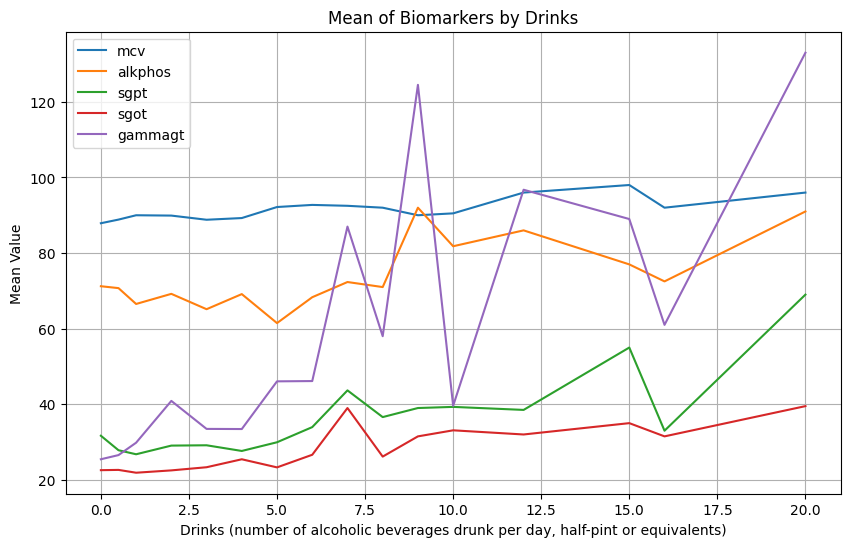

In [3]:

means = bupa.groupby('drinks')[['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt']].mean()
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for column in means.columns:
    plt.plot(means.index, means[column], label=column)
plt.xlabel('Drinks (number of alcoholic beverages drunk per day, half-pint or equivalents)')
plt.ylabel('Mean Value')
plt.title('Mean of Biomarkers by Drinks')
plt.legend()
plt.grid(True)
print(
    "mcv: Mean Corpuscular Volume (fL)\n"
    "alkphos: Alkaline Phosphatase (U/L)\n"
    "sgpt: Alanine Transaminase (U/L)\n"
    "sgot: Aspartate Transaminase (U/L)\n"
    "gammagt: Gamma-Glutamyl Transpeptidase (U/L)"
)
plt.show()


In [4]:
def Intensity(valor):
    if 0 <= valor <= 2: # Use 'valor' instead of 'drinks'
        return 'Moderate'
    elif 3 <= valor <= 4: # Use 'valor' instead of 'drinks'
        return 'High-Intensity'
    elif valor >= 5: # Use 'valor' instead of 'drinks'
        return 'Very High'
bupa['Intensity'] = bupa['drinks'].apply(Intensity)

intensity_summary = bupa.groupby('Intensity').describe()
print(intensity_summary)
import seaborn as sns

frequency_table = bupa['Intensity'].value_counts().reset_index()
frequency_table.columns = ['Intensity', 'Frequency']
frequency_table['Percent'] = (frequency_table['Frequency'] / frequency_table['Frequency'].sum()) * 100
print(frequency_table)


                  mcv                                                       \
                count       mean       std   min    25%   50%   75%    max   
Intensity                                                                    
High-Intensity   71.0  89.126761  3.828202  79.0  87.00  89.0  91.0   99.0   
Moderate        168.0  89.130952  4.386369  65.0  86.75  89.0  92.0  103.0   
Very High       102.0  92.441176  4.123282  82.0  90.00  92.0  95.0  102.0   

               alkphos             ... gammagt        drinks            \
                 count       mean  ...     75%    max  count      mean   
Intensity                          ...                                   
High-Intensity    71.0  67.957746  ...   40.50  169.0   71.0  3.704225   
Moderate         168.0  70.017857  ...   34.25  297.0  168.0  0.827381   
Very High        102.0  71.029412  ...   72.00  225.0  102.0  7.529412   

                                                    
                     std  min  25

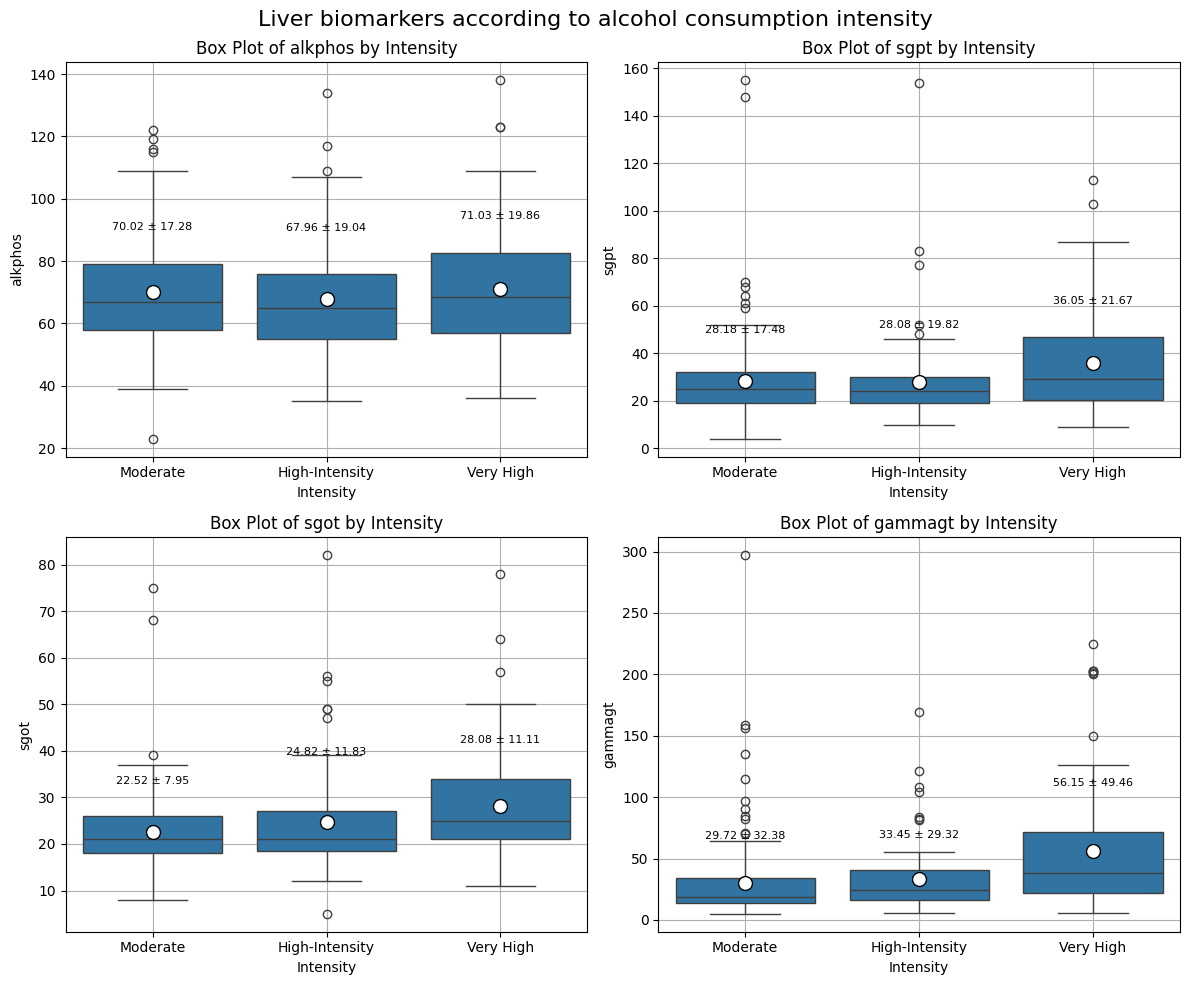

In [5]:
import numpy as np

columns_to_plot = ['alkphos', 'sgpt', 'sgot', 'gammagt']

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    sns.boxplot(x='Intensity', y=column, data=bupa, showmeans=True,
                meanprops={"marker": "o", "markerfacecolor": "white",
                           "markeredgecolor": "black", "markersize": "10"}, ax=ax)


    for intensity in bupa['Intensity'].unique():
        mean = bupa[bupa['Intensity'] == intensity][column].mean()
        std = bupa[bupa['Intensity'] == intensity][column].std()
        ax.text(bupa['Intensity'].unique().tolist().index(intensity),
                mean + std + 2,
                f'{mean:.2f} ± {std:.2f}', ha='center', va='bottom', fontsize=8)

    ax.set_title(f'Box Plot of {column} by Intensity')
    ax.set_ylabel(column)
    ax.set_xlabel('Intensity')
    ax.grid(True)

plt.suptitle('Liver biomarkers according to alcohol consumption intensity', fontsize=16)
plt.tight_layout()
plt.show()


In [6]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

model = smf.ols('alkphos ~ Intensity', data=bupa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("ANOVA Table:")
print(anova_table.iloc[:1])
model = smf.ols('sgpt ~ Intensity', data=bupa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:")
print(anova_table.iloc[:1])

model = smf.ols('sgot ~ Intensity', data=bupa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:")
print(anova_table.iloc[:1])

model = smf.ols('gammagt ~ Intensity', data=bupa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("ANOVA Table:")
print(anova_table.iloc[:1])


ANOVA Table:
               sum_sq   df         F    PR(>F)
Intensity  400.253905  2.0  0.587633  0.556207
ANOVA Table:
                sum_sq   df         F    PR(>F)
Intensity  4460.299899  2.0  5.983848  0.002794
ANOVA Table:
               sum_sq   df          F    PR(>F)
Intensity  1960.31998  2.0  10.091231  0.000055
ANOVA Table:
                 sum_sq   df          F        PR(>F)
Intensity  46521.736171  2.0  16.300193  1.745142e-07


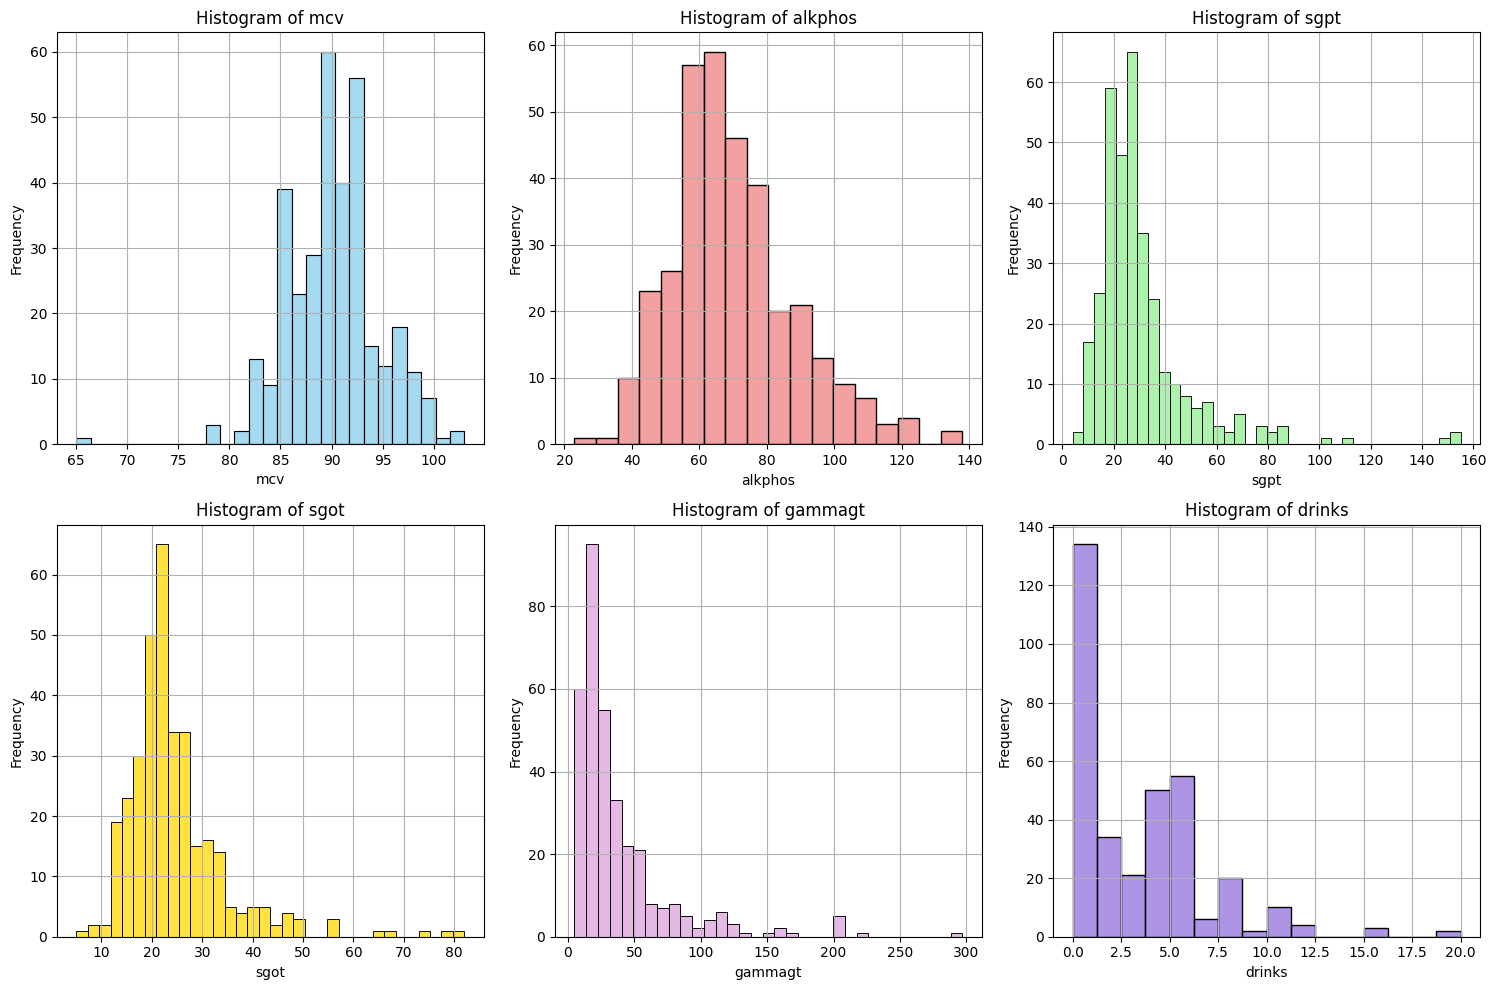

In [7]:
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

columns_to_plot = ['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt', 'drinks']
colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum', 'mediumpurple']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    sns.histplot(bupa[column], bins='auto', color=colors[i], edgecolor='black', ax=ax)
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(True)

plt.tight_layout()
plt.show()


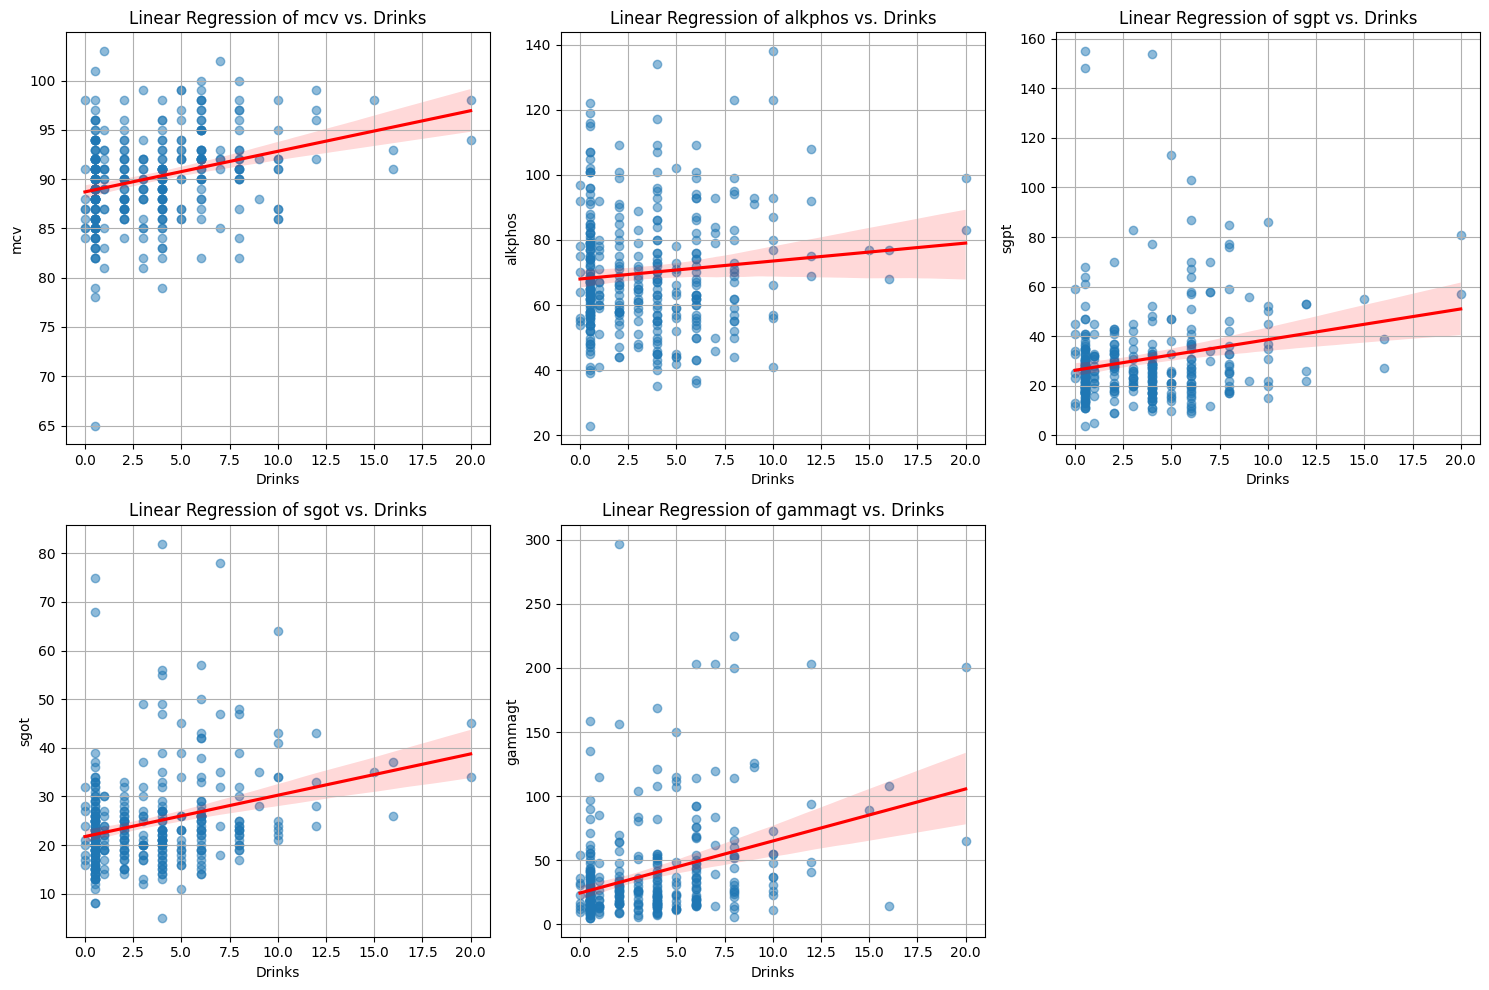

In [8]:
columns_to_plot = ['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    sns.regplot(x='drinks', y=column, data=bupa, ax=ax,
                scatter_kws={'alpha': 0.5},
                line_kws={'color': 'red'})

    ax.set_title(f'Linear Regression of {column} vs. Drinks')
    ax.set_xlabel('Drinks')
    ax.set_ylabel(column)
    ax.grid(True)

for j in range(len(columns_to_plot), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


In [9]:
columns_to_plot = ['mcv', 'alkphos', 'sgpt', 'sgot', 'gammagt']
results_summary = []

for column in columns_to_plot:
    model = smf.ols(formula=f'{column} ~ drinks', data=bupa).fit()
    results_summary.append([column, model.params['drinks'], model.pvalues['drinks'], model.rsquared])

results_df = pd.DataFrame(results_summary, columns=['Variable', 'Coefficient', 'P-value', 'R-squared'])

print(results_df)


  Variable  Coefficient       P-value  R-squared
0      mcv     0.412030  5.440444e-09   0.095629
1  alkphos     0.551265  6.527227e-02   0.009988
2     sgpt     1.236244  8.680910e-05   0.044486
3     sgot     0.849852  1.351856e-07   0.078818
4  gammagt     4.057925  6.764775e-11   0.118214
